# Seattle weather forecasting

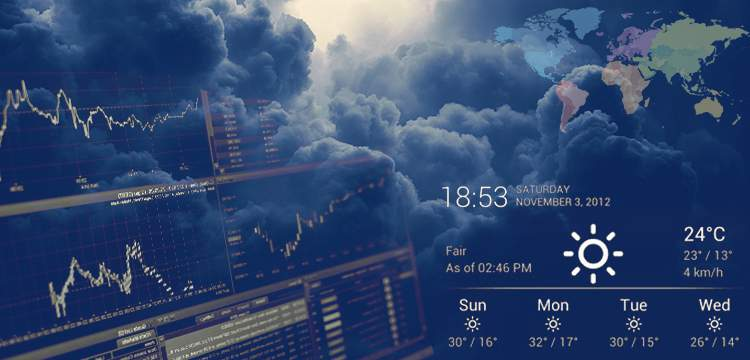

# Project Aim:
To develop a data-driven weather forecasting system that accurately predicts future weather conditions such as temperature, precipitation, humidity, and wind speed using historical meteorological data and machine learning techniques, with the goal of improving forecast accuracy and aiding in timely decision-making for various sectors including agriculture, transportation, and public safety.



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('seattle_weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Basic Checks 

In [3]:
df.shape

(1461, 6)

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
num_data = df.select_dtypes(include=["float64","int64"])
print("numerical columns",num_data.columns)

numerical columns Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')


In [10]:
cat_data=df.select_dtypes(include=["O"])
print("categorical columns",cat_data.columns)

categorical columns Index(['date', 'weather'], dtype='object')


# EDA

In [11]:
import ydata_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
countplot_1 = sns.countplot(x=df["weather"])
count= df.weather.value_counts()
print(count)

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


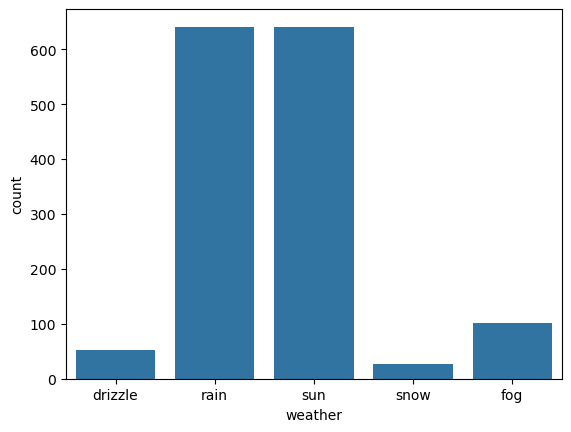

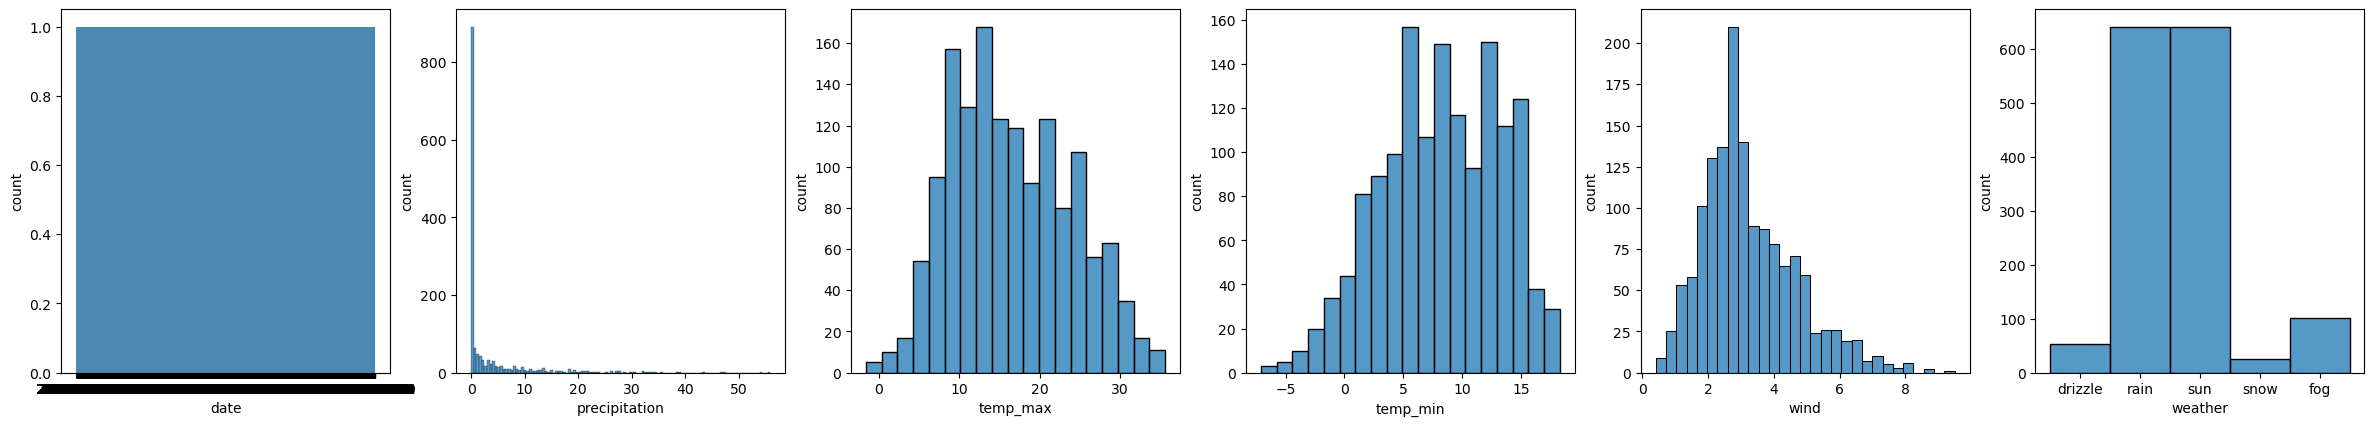

In [13]:
plt.figure(figsize=(45,50),facecolor='white')
plotnumber=1

for column in df:
  if plotnumber<=81:
    ax=plt.subplot(9,9,plotnumber)
    sns.histplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel("count",fontsize=10)
  plotnumber+=1
plt.show()

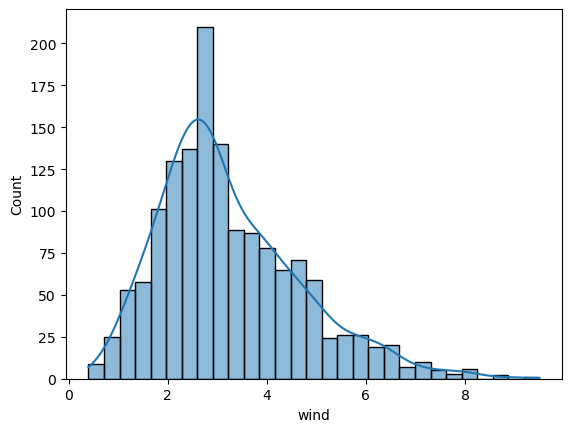

In [14]:
sns.histplot(x=df['wind'],kde=True)
plt.show()

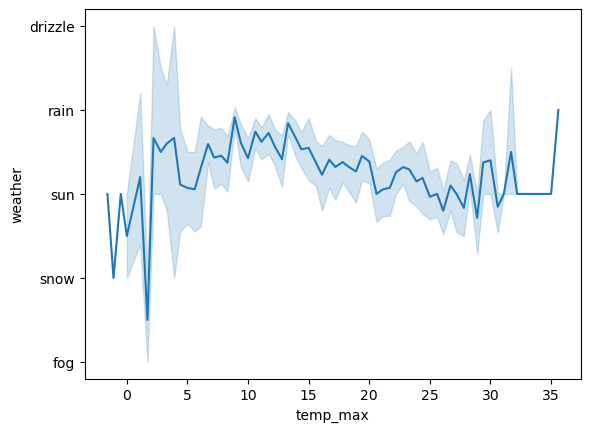

In [15]:
sns.lineplot(x=df['temp_max'],y=df['weather'])
plt.show()

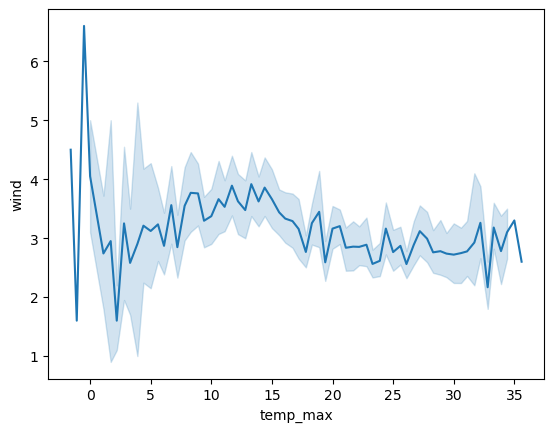

In [16]:
sns.lineplot(x=df['temp_max'],y=df['wind'])
plt.show()

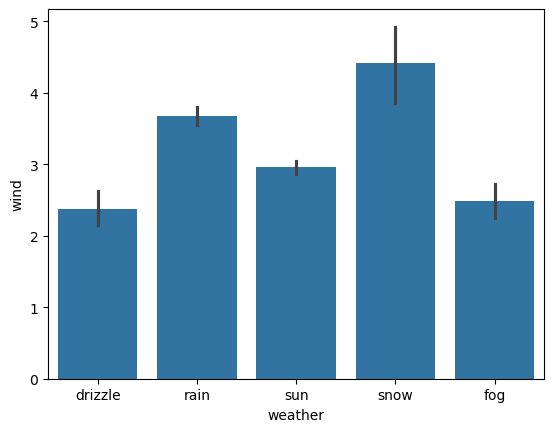

In [17]:
sns.barplot(x=df['weather'],y=df['wind'])
plt.show()

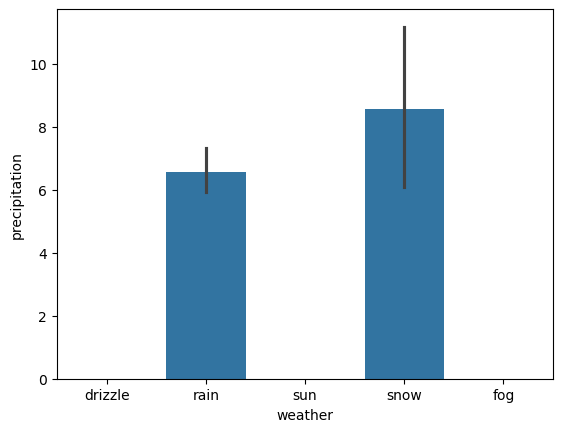

In [18]:
sns.barplot(x=df['weather'],y=df['precipitation'])
plt.show()

# Bivariate Analysis 

In [19]:
num_data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [20]:
d2=df[['precipitation', 'temp_max', 'temp_min', 'wind']]

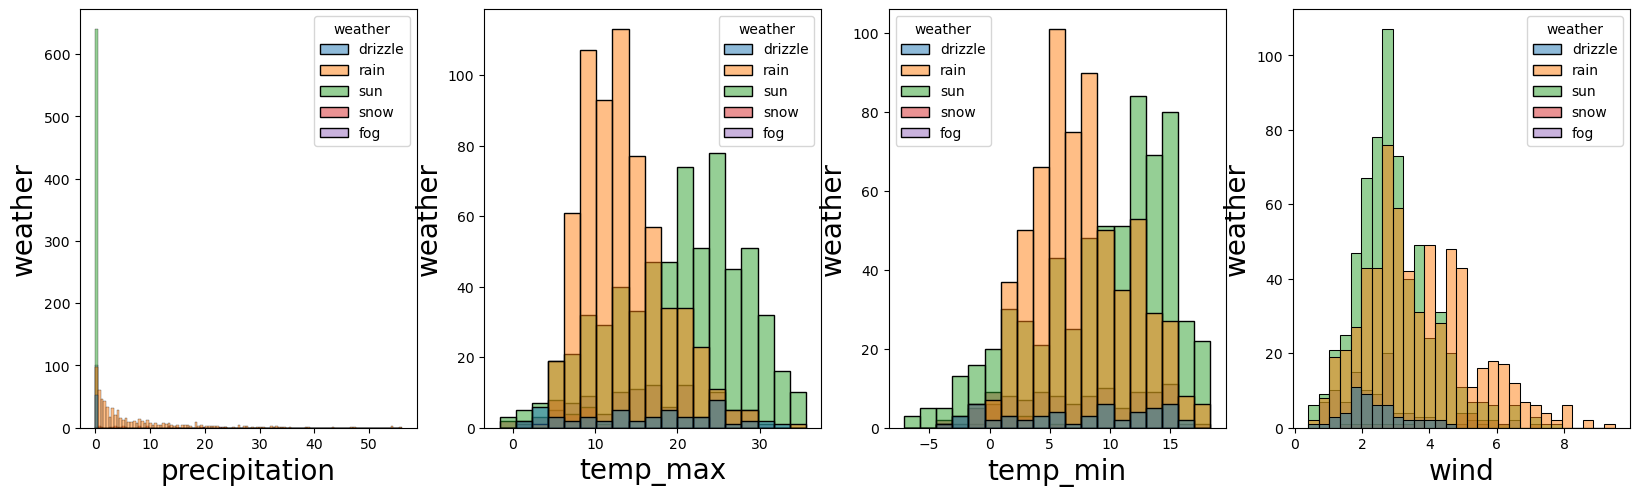

In [21]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d2[column]         
                        ,hue=df.weather)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('weather',fontsize=20)
    plotnumber+=1
plt.show()

# Data Preprocessing 

In [22]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# Check for outliers 

In [23]:
num_data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

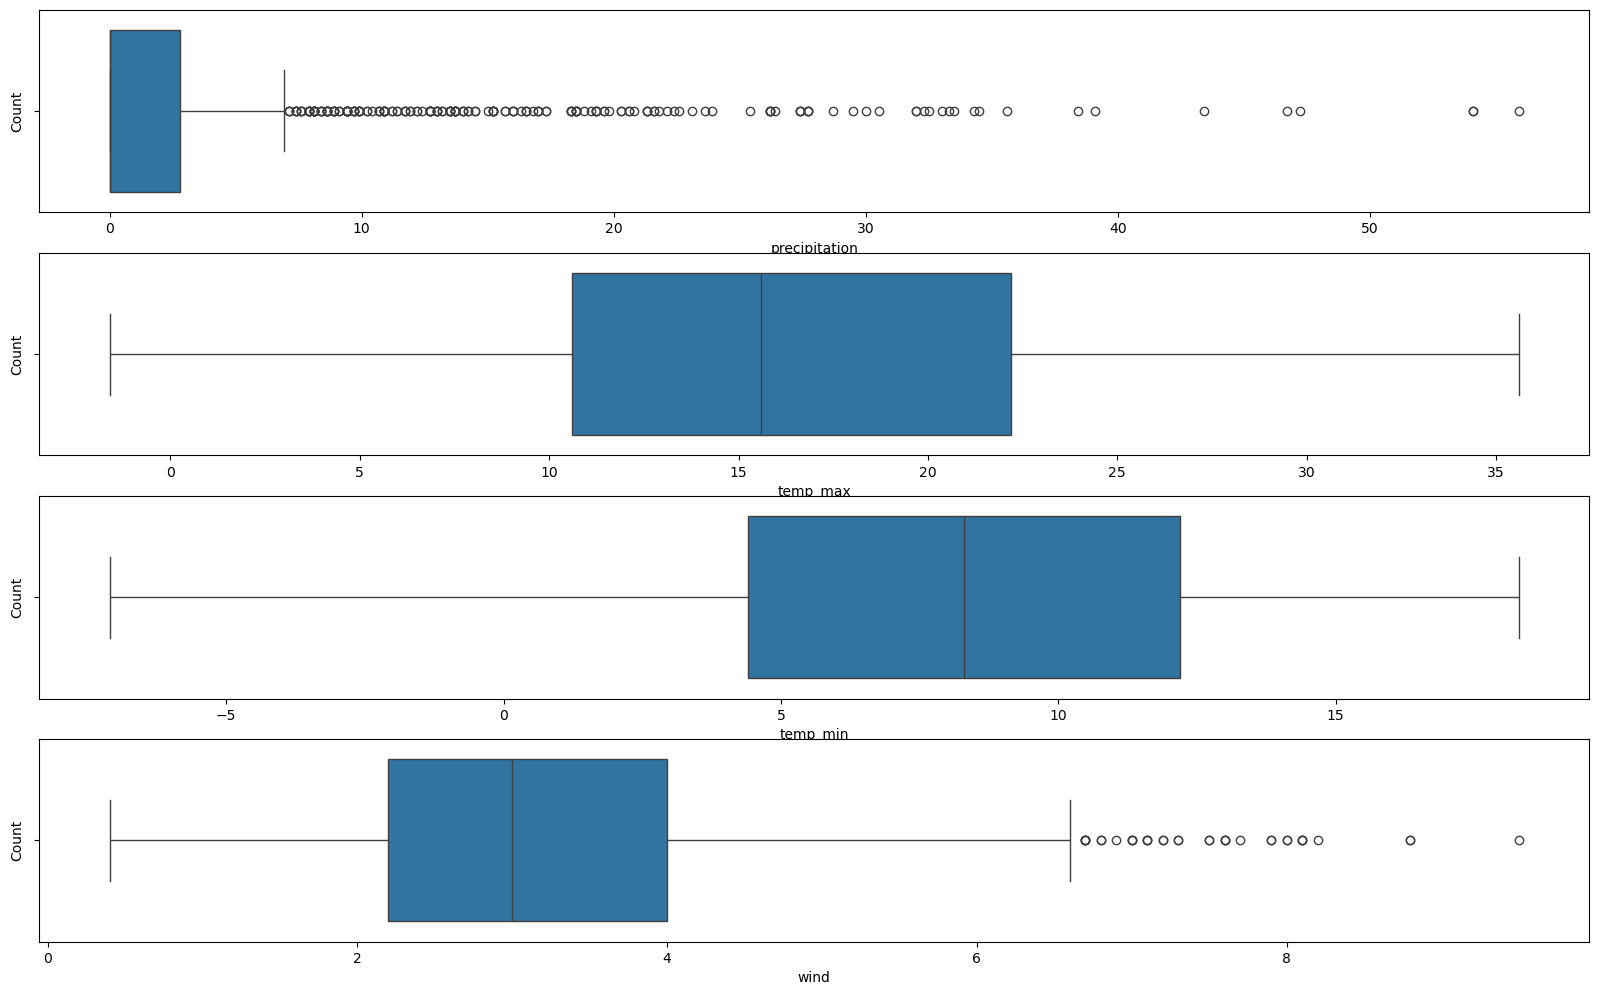

In [24]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in num_data:
  if plotnumber<=16:
    ax=plt.subplot(16,1,plotnumber)
    sns.boxplot(x=df[column])
    plt.xlabel(column,fontsize=10)
    plt.ylabel('Count',fontsize=10)
  plotnumber+=1
plt.show()

In [25]:
Q1=df['wind'].quantile(0.25)
print("lower quartile",Q1)
Q3=df['wind'].quantile(0.75)
print("upper quartile",Q3)
IQR=Q3-Q1
print(IQR)

lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

df.loc[df['wind']>upper_limit]
df.loc[df['wind']<lower_limit]

df.loc[df['wind']<lower_limit,"wind"] =df["wind"].median()
df.loc[df['wind']>upper_limit,"wind"] =df["wind"].median()

lower quartile 2.2
upper quartile 4.0
1.7999999999999998
lower limit is -0.49999999999999956
upper_limit is 6.699999999999999


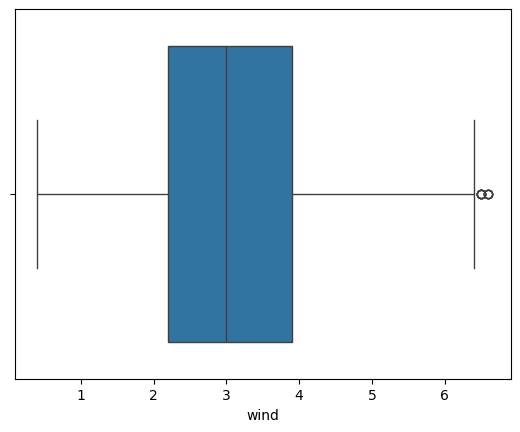

In [26]:
sns.boxplot(x=df['wind'])
plt.show()

# Converting categorical columns to numerical columns 

In [27]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.weather=lc.fit_transform(df.weather)

In [28]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [29]:
num_data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')

In [30]:
num_data1= df[['precipitation', 'temp_max', 'temp_min', 'wind','weather']]

# Feature Engineering 

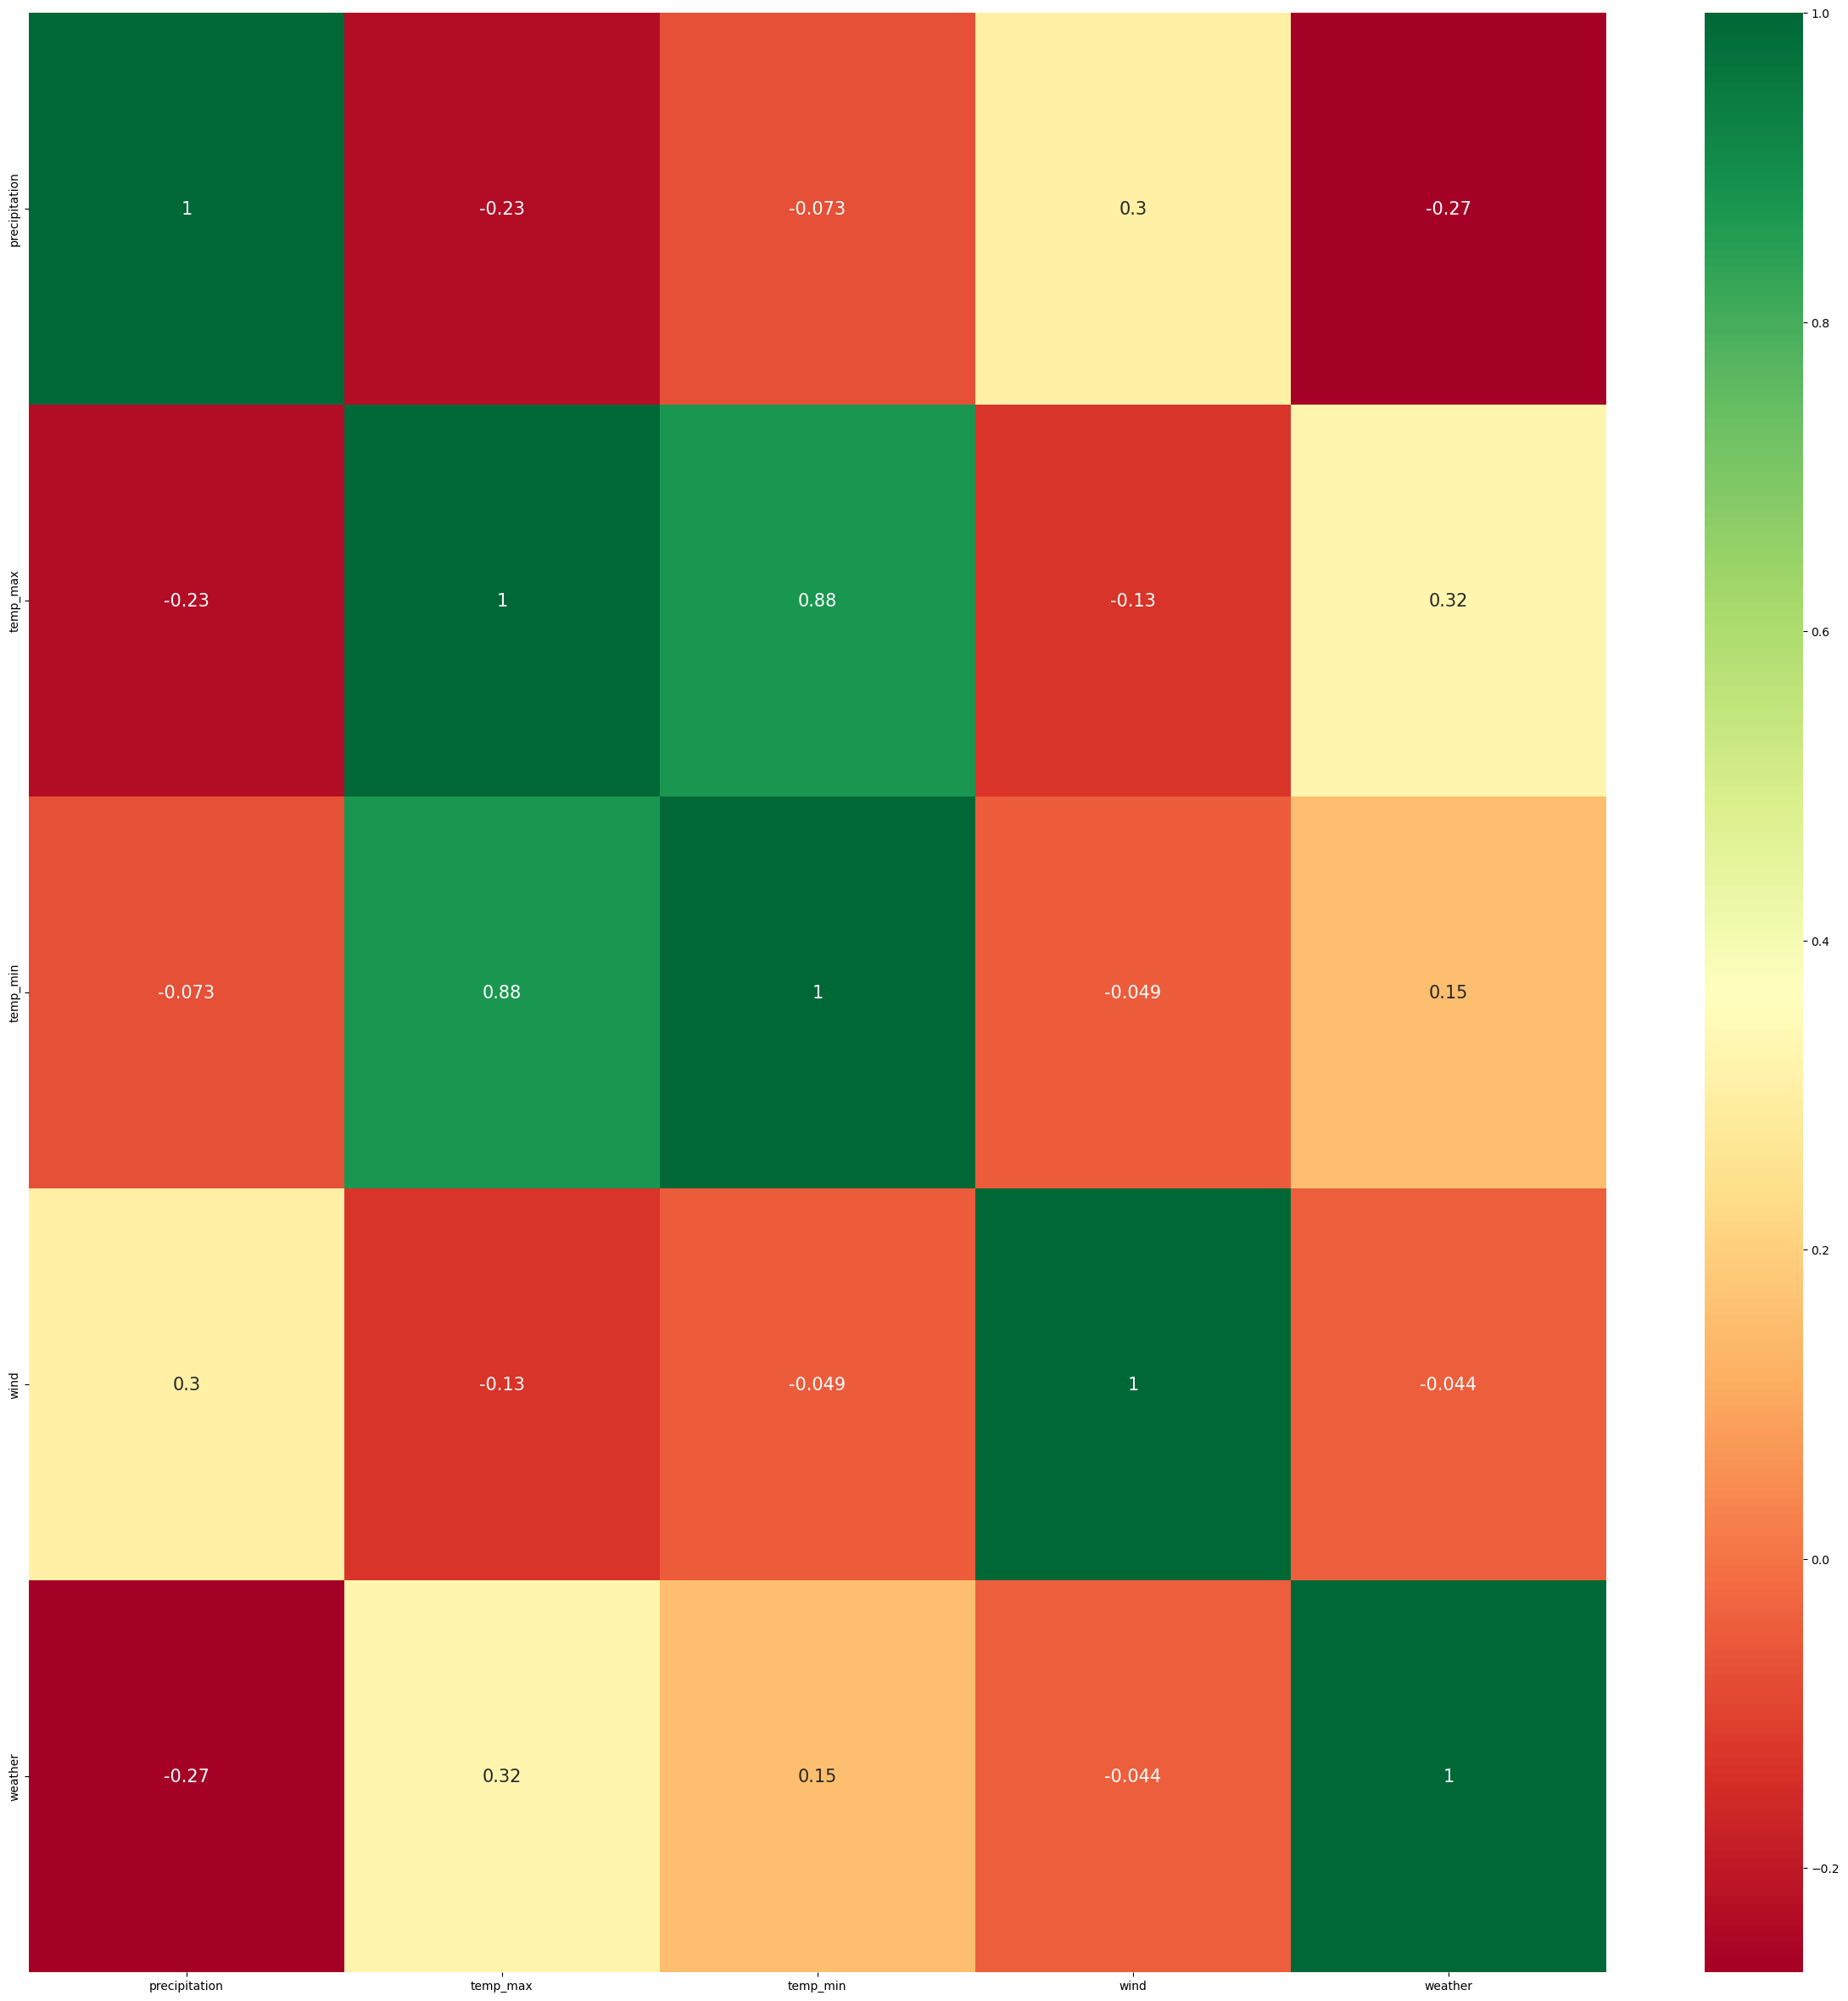

In [31]:
plt.figure(figsize=(30, 30))
sns.heatmap(num_data1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})
plt.show()

# Removing Unwanted column

In [32]:
df.drop(['date'], axis="columns", inplace=True)

In [33]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

# Model Building

In [34]:
## Split data into x and y
x = df.drop('weather', axis=1)
y = df.weather

In [35]:
## training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [36]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [37]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))

actual Counter({2: 521, 4: 509, 1: 76, 0: 44, 3: 18})
after smote Counter({1: 521, 2: 521, 4: 521, 0: 521, 3: 521})


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_smote, y_smote)

logistic_regression_pred = logistic_regression_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, logistic_regression_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, logistic_regression_pred)
print("Accuracy:", accuracy)




Confusion Matrix:
[[  7   2   0   0   0]
 [ 15   6   0   0   4]
 [  4   4 100  10   2]
 [  0   0   0   8   0]
 [ 26  32   0   3  70]]
Accuracy: 0.6518771331058021


In [39]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier() 
model.fit(x_smote,y_smote)
y_pred=model.predict(x_test)

In [40]:
y_train_predict=model.predict(x_train)
y_train_predict

array([1, 2, 2, ..., 2, 4, 1])

In [41]:
# training accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score
accuracy_score(y_train,y_train_predict)

0.997431506849315

In [42]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.7235494880546075

In [43]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20)),
}

In [44]:
tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_smote,y_smote)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [45]:
tree_cv.best_score_

0.8130578078516013

In [46]:
model=DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf= 1,min_samples_split=2,splitter='best')
model.fit(x_smote,y_smote)#training the model
y_pred=model.predict(x_test)#prediction
y_pred#predicted values 

array([0, 2, 0, 0, 2, 2, 4, 0, 2, 0, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4,
       2, 4, 4, 2, 2, 4, 1, 4, 2, 4, 1, 3, 1, 2, 2, 3, 2, 4, 2, 4, 0, 1,
       1, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 1, 2, 4, 4, 4,
       2, 0, 2, 2, 2, 2, 4, 2, 2, 1, 2, 4, 2, 2, 2, 1, 2, 4, 2, 4, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 1, 3, 3, 2, 1, 4, 2, 1, 2,
       2, 0, 2, 2, 4, 0, 4, 4, 4, 2, 2, 2, 2, 3, 4, 4, 1, 1, 4, 4, 0, 4,
       4, 0, 4, 4, 2, 2, 2, 4, 4, 1, 2, 3, 4, 1, 2, 2, 4, 4, 2, 4, 4, 4,
       2, 2, 1, 1, 2, 2, 0, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 0, 4, 2, 2,
       0, 2, 0, 2, 1, 4, 1, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 1, 2, 2,
       2, 2, 2, 4, 0, 2, 1, 2, 2, 4, 3, 4, 2, 4, 4, 4, 4, 4, 4, 0, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 1, 4, 4, 1, 3, 2,
       4, 3, 1, 4, 4, 1, 3, 2, 2, 2, 2, 4, 4, 4, 2, 1, 2, 2, 2, 2, 4, 2,
       4, 1, 2, 1, 4, 1, 1, 4, 4, 2, 4, 4, 2, 3, 4, 4, 1, 2, 4, 2, 4, 0,
       2, 4, 1, 2, 4, 2, 4])

In [47]:
y_train_predict=model.predict(x_smote)#predicting training data to check training performance 
y_train_predict

array([1, 2, 2, ..., 4, 4, 4])

In [48]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.7133105802047781

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_smote, y_smote)

random_forest_pred = random_forest_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, random_forest_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, random_forest_pred)
print("Accuracy:", accuracy)




Confusion Matrix:
[[  3   0   0   0   6]
 [  3   6   2   0  14]
 [  0   1 107   5   7]
 [  0   0   2   6   0]
 [ 10  17   1   0 103]]
Accuracy: 0.7679180887372014


In [50]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] 




In [51]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")
 

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True})


In [59]:
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split=2, min_samples_leaf= 1, max_features='sqrt', max_depth=50, bootstrap=True)#passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)


In [60]:
# testing accuracy
accuracy_score(y_test,y_predict)

0.764505119453925

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(x_smote, y_smote)

gradient_boosting_pred = gradient_boosting_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, gradient_boosting_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, gradient_boosting_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[  2   2   0   0   5]
 [  2  10   1   0  12]
 [  0   3 105   7   5]
 [  0   0   4   4   0]
 [ 11  16   2   0 102]]
Accuracy: 0.7610921501706485


In [55]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)
accuracy_score(y_test,y_pred)

0.6552901023890785

In [56]:
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))
error_rate

[0.3447098976109215,
 0.41638225255972694,
 0.39590443686006827,
 0.4129692832764505,
 0.40955631399317405,
 0.42662116040955633,
 0.42662116040955633,
 0.4334470989761092,
 0.44368600682593856,
 0.45733788395904434]

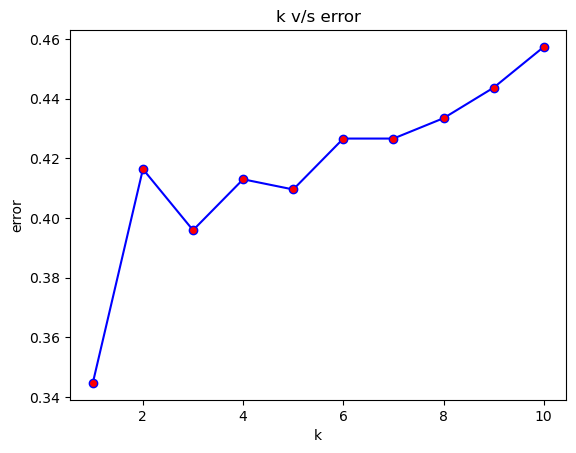

In [57]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")
plt.show()

In [62]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(estimator=gradient_boosting_model,n_estimators=5)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)
accuracy_score(y_test,y_pred)

0.764505119453925